In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset - Titanic

In [3]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")

X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [4]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [5]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

In [6]:
#Convert the X_train, Y_train, X_test, Y_test into numpy
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [7]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [8]:
#Print the X_train, Y_train, X_test, Y_test into numpy
print("Shape of X_train :  ", X_train.shape)
print("Shape of Y_train :  ", Y_train.shape)
print("Shape of X_test :  ", X_test.shape)
print("Shape of Y_test :  ", X_test.shape)

Shape of X_train :   (7, 891)
Shape of Y_train :   (1, 891)
Shape of X_test :   (7, 418)
Shape of Y_test :   (7, 418)


# Logistic Regression Overview :

## Equations :

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ ......... initialize with zeros

$ B = single$  $weight/parameter $

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$


$\sigma = \frac{1}{(1 + e^{-x})}  $   ......... (sigmoid function)


A = $\sigma ( W^T*X + b ) $    ........ (probabilistic predictions of shape (1 x m ) )

<img src = "sigmoid.png" width = 400px>


## Cost function :

$ cost = - \frac{1}{m} \sum_{i=1}^m [ y*log(a) + (1 - y)*log(1 - a) ] $

## Gradient Descent 

$dW = \frac{\partial COST }{\partial W} = ( A - Y )*X^T $ ...... shape (1 x n) 

$dB = \frac{\partial COST }{\partial B} = ( A - Y ) $

$W = W - \alpha * dW^T $

$B = B - \alpha * dB $


<img src = "gradient-descent.png" width = 300px>

# Model

In [17]:
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

In [23]:

def model(X, Y, learning_rate, iterations):
    
    m = X.shape[1]
    n = X.shape[0]
    
    W = np.zeros((1, n))  # Corrected shape of W
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W, X) + B  # transpose of W was giving incorrect results
        A = sigmoid(Z)
        
        # cost function
        cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
        
        # Gradient Descent
        dW = np.dot(A - Y, X.T) / m  # correct formula includes division by m
        dB = np.sum(A - Y) / m  # correct formula includes division by m
        W = W - learning_rate * dW
        B = B - learning_rate * dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if i % (iterations / 10) == 0:
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list


In [27]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.49652777693895306
cost after  20000 iteration is :  0.46674868550665993
cost after  30000 iteration is :  0.45687787762434423
cost after  40000 iteration is :  0.4528899429308965
cost after  50000 iteration is :  0.45093260252226425
cost after  60000 iteration is :  0.44977087490094686
cost after  70000 iteration is :  0.4489640829216279
cost after  80000 iteration is :  0.4483412696612483
cost after  90000 iteration is :  0.4478304524693579


### Cost vs Iteration
Plotting graph to see if Cost Function is decreasing or not

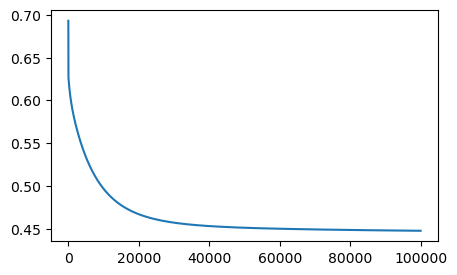

In [36]:
plt.figure(figsize=(5,3))
plt.plot(cost_list)